<h3 style="color:red;">Term neonate of 40 weeks of gestation and 3.5 kg at 24 hours</h3>


 Model 'normal neonate' loaded and initialized correctly.
 Ready in 3.6 sec. Average model step in 0.0297 ms.
Heart.heart_rate: max  112.18838 min  110.99122
AA.pres         : max   64.09847, min   39.98734 mmHg
PA.pres         : max    42.5172, min   18.24823 mmHg
LV_AA.flow      : net  176.35055, forward  176.35055, backward        0.0 ml/kg/min, stroke volume:    1.58873 ml/kg, 
RV_PA.flow      : net  182.19692, forward  182.19692, backward        0.0 ml/kg/min, stroke volume:     1.6414 ml/kg, 
SVC_RA.flow     : net   75.92276, forward   82.42717, backward   -6.50441 ml/kg/min, stroke volume:    0.68398 ml/kg, 
AAR_AD.flow     : net   97.60597, forward   99.64483, backward   -2.03886 ml/kg/min, stroke volume:    0.87933 ml/kg, 
LV.vol          : max    2.52077, min    0.89066 ml/kg
RV.vol          : max    3.36573, min    1.45205 ml/kg


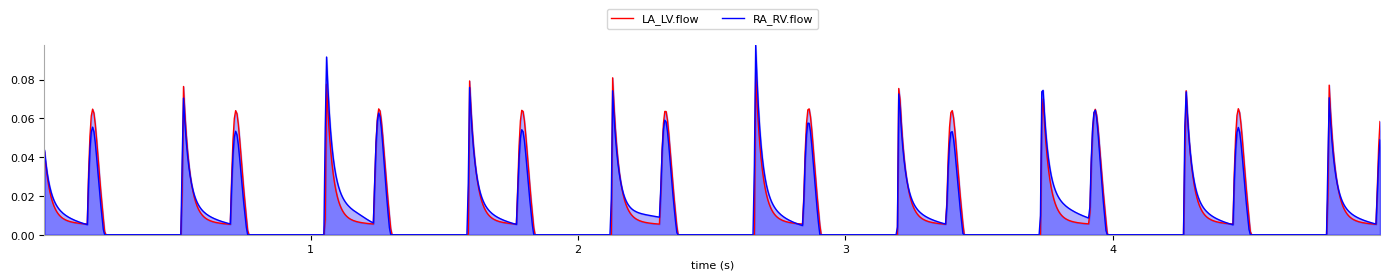

Stroke volume calculation might be inaccurate. Try using a sampleinterval of 0.0005
LA_LV.flow      : net  635.06297, forward  635.06297, backward        0.0 ml/min, stroke volume:    5.67433 ml, 
RA_RV.flow      : net    652.431, forward    652.431, backward        0.0 ml/min, stroke volume:    5.82951 ml, 


In [28]:
# as this notebook is run from a subfolder, we need to change the working directory to the root folder
import os

if os.getcwd().split("/")[-1] != "explain-python":
    os.chdir("..")

# import the model engine and the model interface
from explain_core.ModelEngine import ModelEngine

# instantiate a model engine instance with the 'normal_neonate' model definition
model = ModelEngine("definitions/normal_neonate.json")

# report the gas pressures in kPa
model.set_pressure_unit("kpa")

# get a reference to all the submodels
models = model.models

# instantiate a custom interface object especially designed to interact with the neonatal model engine instance
from interfaces.NeoInterface import NeoInterface

neo = NeoInterface(model)

# enable or disable the physiological submodels which can be enabled or disabled.
neo.ans(True)
neo.breathing(True)
neo.metabolism(True)
neo.mob(False)
neo.pda(False)

# enable or disable the extra-corporeal models
neo.placenta(False)
neo.ventilator(False)
neo.ecls(False)
neo.resuscitation(False)


model.models["LA"].u_vol = 0.0
model.models["LA"].el_min = 1260.0
model.models["LA"].el_max = 4100.0 * 0.8

model.models["LV"].u_vol = 0.00071
model.models["LV"].el_min = 1222.0
model.models["LV"].el_max = 22275.0 * 1.3

model.models["RA"].u_vol = 0.0
model.models["RA"].el_min = 1260.0
model.models["RA"].el_max = 4100.0 * 0.8

model.models["RV"].u_vol = 0.0033
model.models["RV"].el_min = 1159.0
model.models["RV"].el_max = 22990.0 * 1.2

# scale the baseline patient to a gestational age of 40 weeks, 3.568 kg and height 0.512 meters (Fenton Growth Charts p50)
model._scaling.scale_patient(
    weight=3.545,
    height=0.519,
    blood_volume=0.08,
    lung_volume=0.03,
    res_circ_factor=1.2,
    el_base_circ_factor=1.0,
    el_min_circ_factor=1.0,
    el_max_circ_factor=1.0,
    res_resp_factor=1.0,
    el_base_resp_factor=1.0,
    hr_ref=110.0,
    syst_ref=66.0,
    diast_ref=40.0,
    map_ref=51.26,
    resp_rate=40.0,
    vt_rr_ratio=0.0001212,
    mv_ref=0.2,
)

# stabilize the model by calculating 120 seconds
neo.calculate(60)
neo.validate(time_to_calculate=60)
neo.plot_time_graph(["LA_LV.flow", "RA_RV.flow"], time_to_calculate=5)

<h5 style="color:red;">Model run results</h5>

<h5 style="color:red;">Blood flows and volumes target data</h5>
<a href="https://pubmed.ncbi.nlm.nih.gov/37095534/">Jhaveri S, Battersby E, Stern KWD, Cohen J, Yang Y, Price A, Hughes E, Poston L, Pasupathy D, Taylor P, Vieira MC, Groves A. Normative ranges of biventricular volumes and function in healthy term newborns. J Cardiovasc Magn Reson. 2023 Apr 24;25(1):26. doi: 10.1186/s12968-023-00932-1. PMID: 37095534; PMCID: PMC10127416.</a><br>
<img src="../documentation/images/JhaveriTable2LV.jpg" width="400" height="500"></img>
<img src="../documentation/images/JhaveriTable3RV.jpg" width="400" height="500"></img><br>

<a href="https://pubmed.ncbi.nlm.nih.gov/20971721/">Groves AM, Chiesa G, Durighel G, Goldring ST, Fitzpatrick JA, Uribe S, Razavi R, Hajnal JV, Edwards AD. Functional cardiac MRI in preterm and term newborns. Arch Dis Child Fetal Neonatal Ed. 2011 Mar;96(2):F86-91. doi: 10.1136/adc.2010.189142. Epub 2010 Oct 21. PMID: 20971721; PMCID: PMC3093932.</a><br>
<img src="../documentation/images/GrovesFigure3.jpg" width="600" height="480"></img>
<img src="../documentation/images/GrovesFigure5.jpg" width="600" height="480"></img><br> -->
<!-- <img src="../documentation/images/GrovesTable1.jpg" width="300" height="100"></img>
<img src="../documentation/images/GrovesTable3.jpg" width="280" height="100"></img>



<h5 style="color:red;">Blood pressure target data</h5>


<a href="https://pubmed.ncbi.nlm.nih.gov/36858885/">van Zadelhoff AC, Poppe JA, Willemsen S, Mauff K, van Weteringen W, Goos TG, Reiss IKM, Vermeulen MJ, de Graaff JC. Age-dependent changes in arterial blood pressure in neonates during the first week of life: reference values and development of a model. Br J Anaesth. 2023 May;130(5):585-594. doi: 10.1016/j.bja.2023.01.024. Epub 2023 Feb 28. PMID: 36858885.</a><br><br>
<img src="../documentation/images/ZadelhoffSystolicFigure4.jpg" width="600" height="650"></img>
<img src="../documentation/images/ZadelhoffDiastolicFigure4.jpg" width="600" height="650"></img><br>

In [ ]:
neo.calculate(60)
neo.get_total_blood_volume()
neo.get_vitals()

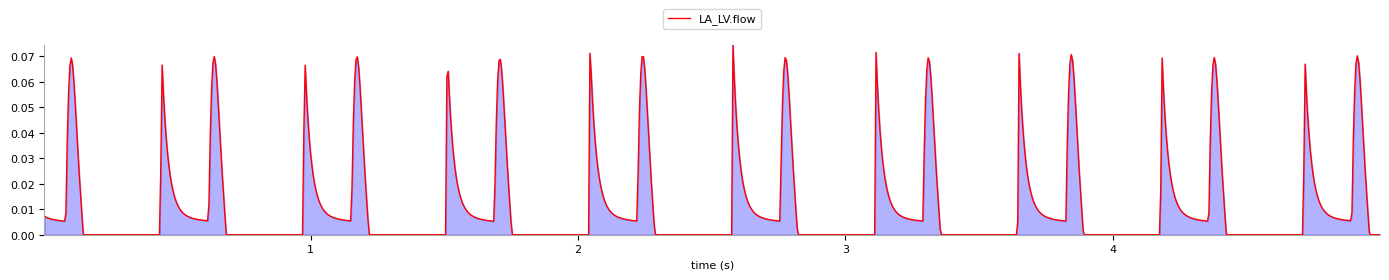

Stroke volume calculation might be inaccurate. Try using a sampleinterval of 0.0005
LA_LV.flow      : net  635.76356, forward  635.76356, backward        0.0 ml/min, stroke volume:    5.66754 ml, 


In [14]:
neo.plot_time_graph(["LA_LV.flow"], time_to_calculate=5)

In [ ]:
model.models["Heart"].hr_ref = 120